## Import Packages

In [1]:
#Import Packages
import pickle

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

## Read Dataset

In [2]:
import pandas as pd
data1 = pd.read_csv('C:/Users/DELL/Desktop/memoire de master/Dataset_memoire/restaurant1.csv',error_bad_lines=False , encoding='utf-8') #lecture de fichier csv trainT.csv

data1

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,sentence,category,polarity,aspect
0,نموت علي اكل تونسي محرحر,FOOD#QUALITY,Positive,اكل
1,شعب هريسه اثبت وجود,GENERAL,Positive,"شعب,اكل"
2,انا فلسطيني بفتخر انو تونس عرب مثلي تحيه لبلد ...,GENERAL,Positive,NaN
3,والله اطيب واذكي شعب ومضياف وشعب راقي تونس بوا...,GENERAL,Positive,شعب
4,والله هذا شاب تونسي رجال وكريم وطيب و ابن ناس...,GENERAL,Positive,شاف
...,...,...,...,...
4224,مضر,RESTAURANT#cleanliness,Negative,اكل
4225,ياسر مسخ,RESTAURANT#cleanliness,Negative,مطعم
4226,ملا تبلبيز,RESTAURANT#cleanliness,Negative,اكل
4227,بنينه برشا و نظيفه انظف من محل عصريه نظيفه من ...,FOOD#QUALITY,Positive,"اكل,نظافة,عنوان,نظافة,نظافة"


In [3]:
x =data1.loc[data1.category  == '#GENERAL']
x

,sentence,category,polarity,aspect


In [4]:
data1.loc[data1.category == 'GENERAL', 'polarity'] = "Neutre"
data1

,sentence,category,polarity,aspect
0,نموت علي اكل تونسي محرحر,FOOD#QUALITY,Positive,اكل
1,شعب هريسه اثبت وجود,GENERAL,Neutre,"شعب,اكل"
2,انا فلسطيني بفتخر انو تونس عرب مثلي تحيه لبلد ...,GENERAL,Neutre,NaN
3,والله اطيب واذكي شعب ومضياف وشعب راقي تونس بوا...,GENERAL,Neutre,شعب
4,والله هذا شاب تونسي رجال وكريم وطيب و ابن ناس...,GENERAL,Neutre,شاف
...,...,...,...,...
4224,مضر,RESTAURANT#cleanliness,Negative,اكل
4225,ياسر مسخ,RESTAURANT#cleanliness,Negative,مطعم
4226,ملا تبلبيز,RESTAURANT#cleanliness,Negative,اكل
4227,بنينه برشا و نظيفه انظف من محل عصريه نظيفه من ...,FOOD#QUALITY,Positive,"اكل,نظافة,عنوان,نظافة,نظافة"


Neutre      1707
Positive    1438
Negative    1084
Name: polarity, dtype: int64

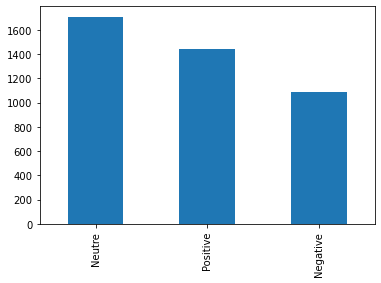

In [5]:
data1.polarity.value_counts().plot.bar()
data1.polarity.value_counts()

In [9]:
x =data1.loc[data1.category  == '#GENERAL']
x

,sentence,category,polarity,aspect


In [10]:
data1.loc[data1.category == "#GENERAL", 'category'] = "RESTAURANT#GENERAL"


GENERAL                    1707
RESTAURANT#GENERAL         1012
FOOD#QUALITY                481
RESTAURANT#SERVICE          365
RESTAURANT#cleanliness      337
RESTAURANT#LOCALISATION     171
FOOD#PRICES                 156
Name: category, dtype: int64

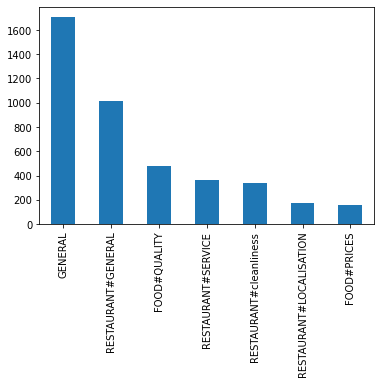

In [11]:
data1.category.value_counts().plot.bar()
data1.category.value_counts()

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
  
train, test = train_test_split (data1, test_size= 0.20)
train.to_csv('train_r.csv', index="true")
test.to_csv('test_r.csv', index="true")

In [7]:
#Read Dataset
data = pd.read_csv('train_r.csv')
test = pd.read_csv('test_r.csv')

In [8]:
train_sen1 = data.iloc[:,1]
train_sen1

0                                      اكل مغربي احسن اكل
1                       اععع لكان نكل نريح يمات في سبيطار
2                              تشهي موش نورمال يسلم ايديك
3                                         كمونيه صبع ادام
4              سلاطه بنيه برشا انشاء الله انجي وناكل منها
                              ...                        
3378                        خير اكل جوع وكول ههه مثل شعبي
3379                    تحيه لتونس من مغرب نحبو برشه برشه
3380                        بان لي هادشي بنين اخو من مغرب
3381                               برعايه خامج و بنين ههه
3382    قمه في تحيل علي حريف 30 د جرد سندويش ملبز في ف...
Name: sentence, Length: 3383, dtype: object

In [9]:
test_sen1 = test.iloc[:,1]
test_sen1


0                                محلا لهجه صفاقسيه زمنيه
1      امممممم رايحه نموت سخفه والله تشهي اخت من جزاء...
2                  هذاك جبن ولا فرماج واش يسموه في جزاءر
3                    تفرجت عليه اكثر من 10 مرات غير عادي
4         سخفتو نحب اكل تونسي حار و بنين لازم نولي و نكل
                             ...                        
841    استعمل عباره اخري بدلا من علوش ال هذه كلمهعيب ...
842    نظيف برشا تبارك الله انا نباتيه ما ناكلش لحم ا...
843    كي مشيت لصفاقس فطرت عندو اخلاق عاليه و نظافه و...
844                     طبق يشهي اما هريسه ياسر تشوي ههه
845    كليت عندو ماكلتو نظيفه و بنينه و معروف حانوتو ...
Name: sentence, Length: 846, dtype: object

In [10]:
aspect_sen = data.iloc[:,2]
aspect_sen

0           RESTAURANT#GENERAL
1                      GENERAL
2                 FOOD#QUALITY
3           RESTAURANT#GENERAL
4                 FOOD#QUALITY
                 ...          
3378                   GENERAL
3379                   GENERAL
3380              FOOD#QUALITY
3381    RESTAURANT#cleanliness
3382    RESTAURANT#cleanliness
Name: category, Length: 3383, dtype: object

In [11]:
test_aspect = test.iloc[:,2]
test_aspect

0                 GENERAL
1                 GENERAL
2      RESTAURANT#GENERAL
3                 GENERAL
4      RESTAURANT#GENERAL
              ...        
841               GENERAL
842    RESTAURANT#SERVICE
843    RESTAURANT#SERVICE
844          FOOD#QUALITY
845          FOOD#QUALITY
Name: category, Length: 846, dtype: object

In [12]:
aspects = aspect_sen.append(test_aspect)
aspects

0      RESTAURANT#GENERAL
1                 GENERAL
2            FOOD#QUALITY
3      RESTAURANT#GENERAL
4            FOOD#QUALITY
              ...        
841               GENERAL
842    RESTAURANT#SERVICE
843    RESTAURANT#SERVICE
844          FOOD#QUALITY
845          FOOD#QUALITY
Name: category, Length: 4229, dtype: object

In [13]:
train_sen = train_sen1.astype(str)
test_sen = test_sen1.astype(str)
aspects = aspects.astype(str)

In [14]:
from sklearn import preprocessing
pre1 = preprocessing.LabelEncoder()
aspects = pre1.fit_transform(aspects)


In [15]:
aspects_train = aspects[:3383]
aspects_test = aspects[3383:]
aspects_train = np.asarray(aspects_train)
aspects_test = np.asarray(aspects_test)
aspects_test

array([2, 2, 3, 2, 3, 0, 6, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 2, 5, 2, 2, 2,
       2, 5, 1, 2, 6, 3, 5, 2, 1, 1, 5, 3, 3, 2, 2, 6, 6, 1, 1, 2, 2, 4,
       5, 6, 2, 1, 2, 2, 5, 5, 2, 3, 5, 2, 5, 5, 6, 3, 3, 4, 1, 2, 3, 3,
       3, 2, 3, 2, 3, 3, 4, 2, 3, 4, 1, 5, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3,
       1, 2, 3, 4, 2, 6, 3, 4, 2, 2, 1, 0, 3, 2, 6, 2, 2, 0, 3, 4, 6, 2,
       0, 5, 2, 2, 1, 2, 2, 1, 3, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3,
       2, 3, 2, 2, 2, 2, 2, 1, 3, 2, 1, 3, 6, 6, 5, 2, 4, 2, 2, 3, 2, 3,
       4, 3, 2, 3, 1, 3, 0, 2, 2, 2, 2, 1, 1, 2, 3, 3, 2, 2, 2, 2, 1, 2,
       6, 3, 2, 5, 3, 0, 3, 2, 5, 3, 2, 3, 3, 5, 1, 3, 3, 2, 5, 3, 2, 6,
       1, 3, 5, 2, 5, 2, 5, 2, 2, 2, 6, 2, 5, 3, 2, 2, 1, 6, 2, 2, 2, 2,
       6, 3, 2, 2, 2, 2, 2, 3, 3, 6, 2, 1, 5, 2, 3, 2, 5, 5, 5, 5, 1, 5,
       2, 5, 2, 6, 3, 2, 5, 1, 3, 3, 5, 5, 6, 0, 4, 2, 5, 3, 0, 2, 1, 3,
       3, 2, 1, 1, 2, 2, 2, 6, 0, 2, 3, 4, 4, 3, 3, 1, 3, 2, 1, 3, 2, 2,
       5, 2, 1, 2, 1, 5, 3, 3, 6, 3, 0, 2, 1, 6, 6,

In [16]:
#Tokenization 
tokenizer = Tokenizer(num_words=2100, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sen)
w_i = tokenizer.word_index
print(w_i)

{'<OOV>': 1, 'و': 2, 'في': 3, 'من': 4, 'تونس': 5, 'الله': 6, 'علي': 7, 'ربي': 8, 'ما': 9, 'اكل': 10, 'ههه': 11, 'يا': 12, 'انا': 13, 'تونسي': 14, 'تحيه': 15, 'هذا': 16, 'الي': 17, 'كل': 18, 'لا': 19, 'والله': 20, 'جزائر': 21, 'عند': 22, 'مع': 23, 'ان': 24, 'بيض': 25, 'كفتاجي': 26, 'ناس': 27, 'صحه': 28, 'كسكروت': 29, 'ماكله': 30, 'اما': 31, 'كان': 32, 'عجه': 33, 'توانسه': 34, 'شعب': 35, 'برشا': 36, 'تونسيه': 37, 'هريسه': 38, 'مغرب': 39, 'لي': 40, 'وين': 41, 'او': 42, 'فيه': 43, 'حتي': 44, 'مطعم': 45, 'ولا': 46, 'غير': 47, 'شاء': 48, 'بلاد': 49, 'لتونس': 50, 'هو': 51, 'مش': 52, 'بعد': 53, 'اهل': 54, 'فيديو': 55, 'سرد': 56, 'نظافه': 57, 'بنين': 58, 'خويا': 59, 'حاجه': 60, 'كي': 61, 'واحد': 62, 'كيف': 63, 'اخو': 64, 'فيها': 65, 'تحياتي': 66, 'طيب': 67, 'اكله': 68, 'عليه': 69, 'موش': 70, 'سندويتش': 71, 'خبز': 72, 'خير': 73, 'نحب': 74, 'جدا': 75, 'لكن': 76, 'عربي': 77, 'مرحبا': 78, 'يخدم': 79, 'احلي': 80, 'هي': 81, 'دينار': 82, 'شي': 83, 'علاش': 84, 'يعطيك': 85, 'مره': 86, 'باش': 87, 'ماشاء'

In [17]:
# saving tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
# loading tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [19]:
# saving aspects encoder
with open('aspects_encoder.pickle', 'wb') as handle:
    pickle.dump(pre1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
# loading aspects encoder
with open('aspects_encoder.pickle', 'rb') as handle:
    aspects_encoder = pickle.load(handle)

In [21]:
#Sequencing 
seq_train = tokenizer.texts_to_sequences(train_sen)
seq_test = tokenizer.texts_to_sequences(test_sen)
print(seq_test)

[[361, 501, 460, 1989], [1, 1, 180, 1, 20, 479, 407, 4, 1146, 1, 1, 22], [1, 402, 46, 1230, 172, 1, 3, 1146], [1, 69, 117, 4, 314, 1, 47, 496], [1267, 74, 10, 14, 129, 2, 58, 96, 1, 2, 1279], [13, 63, 1238, 5, 909, 103, 102, 1, 1729, 1, 1, 43, 1, 124, 14, 1, 1, 1, 1, 1, 1, 1], [134, 1, 1714, 444, 1, 308, 1, 493], [265, 6, 425, 1, 6, 73, 1, 85, 28, 59, 1313, 937], [11, 1], [13, 1, 5, 1099, 22, 136, 3, 100, 1, 969, 1357, 47, 1, 1], [894, 403, 97, 1485, 1], [1, 1047, 74, 2099], [1, 6, 131], [1, 1551, 1, 12, 1], [4, 21, 16, 1, 2, 1, 2, 267, 10, 1152, 328, 151], [195, 1, 1, 7, 1, 1, 74, 245, 223], [147, 13, 14, 1, 1, 723, 40, 239, 243, 745], [501, 460, 1949], [8, 260, 1, 28, 132, 1409, 2, 390, 1, 105], [147, 179, 349, 1, 1, 55, 1], [679, 1803, 1, 2028, 121, 1], [104, 1, 1002, 21], [1164, 1, 884], [85, 28, 668, 1], [24, 106, 167, 102, 102, 33, 1, 1349, 404, 161, 1036, 102, 20, 156, 9, 109, 1825, 24, 1, 4, 1, 1], [15, 4, 924], [524, 436, 45, 90, 1], [252, 625, 1617], [6, 1, 104, 304, 127, 5, 

In [22]:
#Padding
pad_train = pad_sequences(seq_train, padding='post',maxlen=100)
pad_test = pad_sequences(seq_test, padding='post',maxlen=100)
print(pad_test)

[[ 361  501  460 ...    0    0    0]
 [   1    1  180 ...    0    0    0]
 [   1  402   46 ...    0    0    0]
 ...
 [  61  330  628 ...    0    0    0]
 [ 513  252   31 ...    0    0    0]
 [ 167  102 1715 ...    0    0    0]]


In [23]:
lab_train1 = data.iloc[:,3]
lab_test = test.iloc[:,3]


In [24]:
labs = lab_train1.append(lab_test)
#str lab_train
lab_train = lab_train1.astype(str)
#str lab_test
lab_test = lab_test.astype(str)
labs = labs.astype(str)
pre2 = preprocessing.LabelEncoder()
labs = pre2.fit_transform(labs)
labs_train = labs[:3383]
labs_test = labs[3383:]
labs_train = np.asarray(labs_train)
labs_test = np.asarray(labs_test)
labs_test

array([1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2,
       2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0,
       0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0,
       2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1,
       0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1,
       0, 2, 1, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 0, 1, 2, 2, 1, 0,
       0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1,
       2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2,

In [25]:
# saving sentiments encoder
with open('sentiments_encoder.pickle', 'wb') as handle:
    pickle.dump(pre2, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [26]:
# loading aspects encoder
with open('sentiments_encoder.pickle', 'rb') as handle:
    sentiments_encoder = pickle.load(handle)

In [27]:
!pip install numpy==1.19


  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Accès refusé: 'C:\\Users\\DELL\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [28]:

#Model1 for Aspect Categorization - GRU
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(2100,6, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(6,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(3)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(35,activation='softmax')
])
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 6)            12600     
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 12)           504       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 6)                 306       
_________________________________________________________________
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 35)                245       
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


In [29]:
#Model2 for Sentiment Classification - GRU
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(2100,8, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(4,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(2)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 8)            16800     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 8)            336       
_________________________________________________________________
bidirectional_3 (Bidirection (None, 4)                 144       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 17,315
Trainable params: 17,315
Non-trainable params: 0
_________________________________________________________________


In [30]:
#Training and Prediction of Model1: ASPECT
epoch1 = 70
history1 = model1.fit(pad_train, aspects_train, epochs=epoch1, validation_data=(pad_test,aspects_test))
pred1 = model1.predict(pad_test)
aspects_pred = pred1.argmax(axis=-1)
print(pre1.inverse_transform(aspects_pred))
print(pre1.inverse_transform(aspects_test))

Epoch 1/70
106/106 [==============================] - 37s 194ms/step - loss: 3.2528 - accuracy: 0.1117 - val_loss: 2.7009 - val_accuracy: 0.1076
Epoch 2/70
106/106 [==============================] - 19s 178ms/step - loss: 2.1843 - accuracy: 0.2122 - val_loss: 1.8689 - val_accuracy: 0.3995
Epoch 3/70
106/106 [==============================] - 17s 162ms/step - loss: 1.7408 - accuracy: 0.4047 - val_loss: 1.7127 - val_accuracy: 0.3995
Epoch 4/70
106/106 [==============================] - 18s 170ms/step - loss: 1.6676 - accuracy: 0.4047 - val_loss: 1.6808 - val_accuracy: 0.3995
Epoch 5/70
106/106 [==============================] - 18s 167ms/step - loss: 1.6467 - accuracy: 0.4047 - val_loss: 1.6662 - val_accuracy: 0.3995
Epoch 6/70
106/106 [==============================] - 19s 177ms/step - loss: 1.6366 - accuracy: 0.4047 - val_loss: 1.6585 - val_accuracy: 0.3995
Epoch 7/70
106/106 [==============================] - 18s 171ms/step - loss: 1.6313 - accuracy: 0.4047 - val_loss: 1.6536 - val_ac

In [31]:
#Training and Prediction for Model2:SENTIMENT
epoch2 = 70
history2 = model2.fit(pad_train, labs_train, epochs=epoch2, validation_data=(pad_test,labs_test))
pred2 = model2.predict(pad_test)
labs_pred = pred2.argmax(axis=-1)
print(pre2.inverse_transform(labs_pred))
print(pre2.inverse_transform(labs_test))

Epoch 1/70
106/106 [==============================] - 30s 185ms/step - loss: 1.0858 - accuracy: 0.4047 - val_loss: 1.0705 - val_accuracy: 0.3995
Epoch 2/70
106/106 [==============================] - 17s 159ms/step - loss: 1.0201 - accuracy: 0.4608 - val_loss: 0.9930 - val_accuracy: 0.5201
Epoch 3/70
106/106 [==============================] - 17s 158ms/step - loss: 0.9086 - accuracy: 0.5862 - val_loss: 0.9429 - val_accuracy: 0.5697
Epoch 4/70
106/106 [==============================] - 17s 161ms/step - loss: 0.8235 - accuracy: 0.6326 - val_loss: 0.9385 - val_accuracy: 0.5792
Epoch 5/70
106/106 [==============================] - 17s 160ms/step - loss: 0.7668 - accuracy: 0.6568 - val_loss: 0.9331 - val_accuracy: 0.5839
Epoch 6/70
106/106 [==============================] - 17s 159ms/step - loss: 0.7189 - accuracy: 0.6701 - val_loss: 0.9581 - val_accuracy: 0.5709
Epoch 7/70
106/106 [==============================] - 17s 159ms/step - loss: 0.6874 - accuracy: 0.6754 - val_loss: 0.9957 - val_ac

106/106 [==============================] - 17s 161ms/step - loss: 0.3305 - accuracy: 0.8779 - val_loss: 1.7156 - val_accuracy: 0.5662
Epoch 58/70
106/106 [==============================] - 17s 158ms/step - loss: 0.3225 - accuracy: 0.8832 - val_loss: 1.7501 - val_accuracy: 0.5686
Epoch 59/70
106/106 [==============================] - 17s 158ms/step - loss: 0.3171 - accuracy: 0.8856 - val_loss: 1.7969 - val_accuracy: 0.5615
Epoch 60/70
106/106 [==============================] - 17s 157ms/step - loss: 0.3090 - accuracy: 0.8886 - val_loss: 1.8311 - val_accuracy: 0.5603
Epoch 61/70
106/106 [==============================] - 17s 158ms/step - loss: 0.3032 - accuracy: 0.8900 - val_loss: 1.8752 - val_accuracy: 0.5626
Epoch 62/70
106/106 [==============================] - 17s 158ms/step - loss: 0.2973 - accuracy: 0.8945 - val_loss: 1.8751 - val_accuracy: 0.5615
Epoch 63/70
106/106 [==============================] - 17s 159ms/step - loss: 0.2921 - accuracy: 0.8954 - val_loss: 1.9343 - val_accurac

In [55]:
#Test on single random instance
text="امييه يشهي يهبل نموت علي كفتاجي "
instance = np.asarray([text])
print(text)

instance = tokenizer.texts_to_sequences(instance)
instance = pad_sequences(instance, padding='post', maxlen=100)
# Predict Aspect
pred_in1 = model1.predict(instance)
aspects_in = pred_in1.argmax(axis=1)
print(pre1.inverse_transform(aspects_in))
# Predict Sentiment
pred_in2 = model2.predict(instance)
labs_in = pred_in2.argmax(axis=-1)
print(pre2.inverse_transform(labs_in))

امييه يشهي يهبل نموت علي كفتاجي 
['RESTAURANT#GENERAL']
['Positive']


In [56]:
#Test on single random instance
text="حطل اسوام عاد "
instance = np.asarray([text])
print(text)

instance = tokenizer.texts_to_sequences(instance)
instance = pad_sequences(instance, padding='post', maxlen=100)
# Predict Aspect
pred_in1 = model1.predict(instance)
aspects_in = pred_in1.argmax(axis=1)
print(pre1.inverse_transform(aspects_in))
# Predict Sentiment
pred_in2 = model2.predict(instance)
labs_in = pred_in2.argmax(axis=1)
print(pre2.inverse_transform(labs_in))

حطل اسوام عاد 
['FOOD#PRICES']
['Positive']


In [57]:
#Test on single random instance
text="يعطيه صحه راجل وسيد رجال "
instance = np.asarray([text])
print(text)

instance = tokenizer.texts_to_sequences(instance)
instance = pad_sequences(instance, padding='post', maxlen=100)
# Predict Aspect
pred_in1 = model1.predict(instance)
aspects_in = pred_in1.argmax(axis=1)
print(pre1.inverse_transform(aspects_in))
# Predict Sentiment
pred_in2 = model2.predict(instance)
labs_in = pred_in2.argmax(axis=1)
print(pre2.inverse_transform(labs_in))


يعطيه صحه راجل وسيد رجال 
['RESTAURANT#SERVICE']
['Positive']


In [58]:
reverse_word_index = dict([(value, key) for (key, value) in w_i.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(reverse_word_index)

{1: '<OOV>', 2: 'و', 3: 'في', 4: 'من', 5: 'تونس', 6: 'الله', 7: 'علي', 8: 'ربي', 9: 'ما', 10: 'ههه', 11: 'اكل', 12: 'انا', 13: 'يا', 14: 'تونسي', 15: 'هذا', 16: 'الي', 17: 'تحيه', 18: 'والله', 19: 'كل', 20: 'لا', 21: 'جزائر', 22: 'مع', 23: 'ان', 24: 'عند', 25: 'ناس', 26: 'بيض', 27: 'كفتاجي', 28: 'صحه', 29: 'اما', 30: 'ماكله', 31: 'كسكروت', 32: 'عجه', 33: 'كان', 34: 'توانسه', 35: 'شعب', 36: 'برشا', 37: 'حتي', 38: 'تونسيه', 39: 'شاء', 40: 'وين', 41: 'مطعم', 42: 'فيه', 43: 'ولا', 44: 'هريسه', 45: 'لي', 46: 'او', 47: 'مغرب', 48: 'لتونس', 49: 'بلاد', 50: 'بنين', 51: 'مش', 52: 'فيها', 53: 'فيديو', 54: 'نظافه', 55: 'حاجه', 56: 'غير', 57: 'خويا', 58: 'كيف', 59: 'واحد', 60: 'هو', 61: 'بعد', 62: 'سرد', 63: 'اكله', 64: 'تحياتي', 65: 'كي', 66: 'اهل', 67: 'خير', 68: 'مره', 69: 'احلي', 70: 'شي', 71: 'ماشاء', 72: 'نحب', 73: 'اخو', 74: 'طيب', 75: 'سندويتش', 76: 'موش', 77: 'عندو', 78: 'هي', 79: 'جدا', 80: 'مرحبا', 81: 'باش', 82: 'حمص', 83: 'زيت', 84: 'اول', 85: 'عربي', 86: 'بنينه', 87: 'عليه', 88: 'شكر

In [59]:
e1 = model1.layers[0]
weights1 = e1.get_weights()[0]
print(weights1.shape)

(2100, 6)


In [60]:
e2 = model2.layers[0]
weights2 = e2.get_weights()[0]
print(weights2.shape)

(2100, 8)


In [61]:
import io

out_v = io.open('vecs2.tsv', 'w', encoding='utf-8')
out_m = io.open('meta2.tsv', 'w', encoding='utf-8')
for word_num in range(1, 2090):
    word = reverse_word_index[word_num]
    embeddings = weights2[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [62]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs2.tsv')
    files.download('meta2.tsv')

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
print("confusion matrix \n",confusion_matrix(aspects_test, aspects_pred))
print("\nclassification_report \n", classification_report(aspects_test,aspects_pred))

confusion matrix 
 [[  0   1   0   5   3   4  12]
 [  0  25  15  29   2   9  11]
 [  0  20 206  70  16  14  12]
 [  0  21  63  76   2  13  21]
 [  0   2  15   1  24   0   2]
 [  0  12  29   9   0  22  14]
 [  0   7   4  10   5  11  29]]

classification_report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.28      0.27      0.28        91
           2       0.62      0.61      0.61       338
           3       0.38      0.39      0.38       196
           4       0.46      0.55      0.50        44
           5       0.30      0.26      0.28        86
           6       0.29      0.44      0.35        66

    accuracy                           0.45       846
   macro avg       0.33      0.36      0.34       846
weighted avg       0.44      0.45      0.45       846



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.metrics import confusion_matrix,classification_report
print("confusion matrix \n",confusion_matrix(labs_test, labs_pred))
print("\nclassification_report \n", classification_report(labs_test,labs_pred))

confusion matrix 
 [[117  39  49]
 [ 31 232  75]
 [ 88  91 124]]

classification_report 
               precision    recall  f1-score   support

           0       0.50      0.57      0.53       205
           1       0.64      0.69      0.66       338
           2       0.50      0.41      0.45       303

    accuracy                           0.56       846
   macro avg       0.55      0.56      0.55       846
weighted avg       0.56      0.56      0.55       846



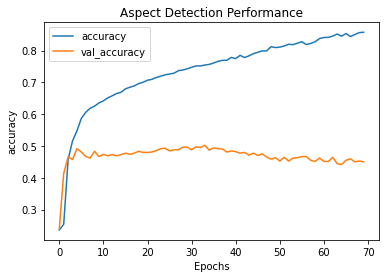

In [65]:
#Performance Visualization - Accuracy for Aspect Categorization 
def plot_graphs1(history1, string):
  plt.plot(history1.history[string])
  plt.plot(history1.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title('Aspect Detection Performance')
  plt.show()

plot_graphs1(history1, 'accuracy')

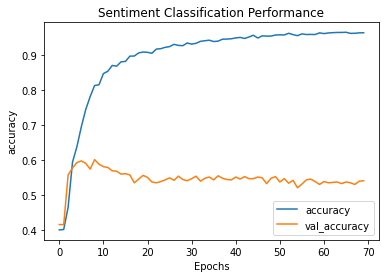

In [66]:
#Performance Visualization - Accuracy for Sentiment Classification 
def plot_graphs2(history2, string):
  plt.plot(history2.history[string])
  plt.plot(history2.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title('Sentiment Classification Performance')
  plt.show()

plot_graphs2(history2, 'accuracy')

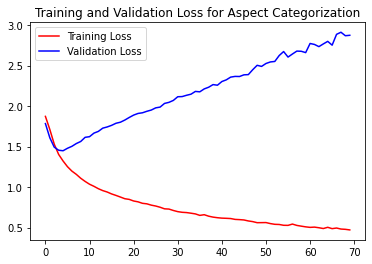

In [67]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss for Aspect Categorization')
plt.legend()

plt.show()

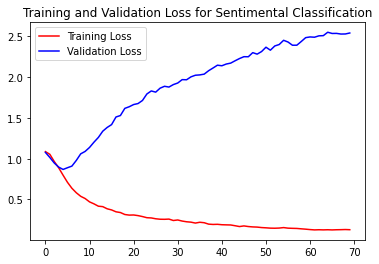

In [68]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss for Sentimental Classification')
plt.legend()

plt.show()